# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

ModuleNotFoundError: No module named 'xgboost'

# Data Importing

In [ ]:
train_df = pd.read_csv(r'C:\Users\alexa\OneDrive\Έγγραφα\Work_Python\Data_Analysis\Project1_Titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\alexa\OneDrive\Έγγραφα\Work_Python\Data_Analysis\Project1_Titanic\test.csv')

## Data Inspection

In [ ]:
def inspect_dataframe(df, name="Dataset"):
    print(f"Head {name}:\n", df.head(), "\n")
    print(f"Info of {name}:\n", {df.info()}, "\n")
    print(f"Shape of {name}:\n", {df.shape}, "\n")
    print(f"Summary {name}:\n, {df.describe(include='all')}")
    print(f"Missing values in {name}:\n", df.isna().sum(), "\n")

inspect_dataframe(train_df, "Train dataset")
inspect_dataframe(test_df, "Test dataset")

Head Train dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [ ]:
train_df.drop(columns=['Ticket', 'Cabin'], inplace=True)
train_df= train_df.dropna(axis=0)
inspect_dataframe(train_df, "Train dataset")
test_df.drop(columns=['Ticket', 'Cabin'], inplace=True)

Head Train dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S   

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-N

## Exploratory Data Analysis  - EDA

In [ ]:
print('Distribution of the target variable:') # Check the people who survived
print(train_df['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Pclass:') # Check the people who survived by Pclass
print(train_df.groupby('Pclass')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Embarked:') # Check the people who survived by Embarked
print(train_df.groupby('Embarked')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Sex:') # Check the people who survived by Sex
print(train_df.groupby('Sex')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to SibSp:') # Check the people who survived by SibSp
print(train_df.groupby('SibSp')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Parch:') # Check the people who survived by Parch
print(train_df.groupby('Parch')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Age:') # Check the people who survived by Age
print(train_df.groupby('Age')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Fare:') # Check the people who survived by Fare
print(train_df.groupby('Fare')['Survived'].value_counts())
print('_____________________________________________')

Distribution of the target variable:
Survived
0    424
1    288
Name: count, dtype: int64
_____________________________________________
Distribution of the target variable with respect to Pclass:
Pclass  Survived
1       1           120
        0            64
2       0            90
        1            83
3       0           270
        1            85
Name: count, dtype: int64
_____________________________________________
Distribution of the target variable with respect to Embarked:
Embarked  Survived
C         1            79
          0            51
Q         0            20
          1             8
S         0           353
          1           201
Name: count, dtype: int64
_____________________________________________
Distribution of the target variable with respect to Sex:
Sex     Survived
female  1           195
        0            64
male    0           360
        1            93
Name: count, dtype: int64
_____________________________________________
Distribution of the 

## EDA Visualization

### Fill NaN Values for Visualizing

In [ ]:
# Ensure 'Survived' is treated as categorical
train_df['Survived'] = train_df['Survived'].astype('category')

# Alternatively, fill missing values the most common value S
train_df['Embarked'] = train_df['Embarked'].fillna('S')

### Graphs

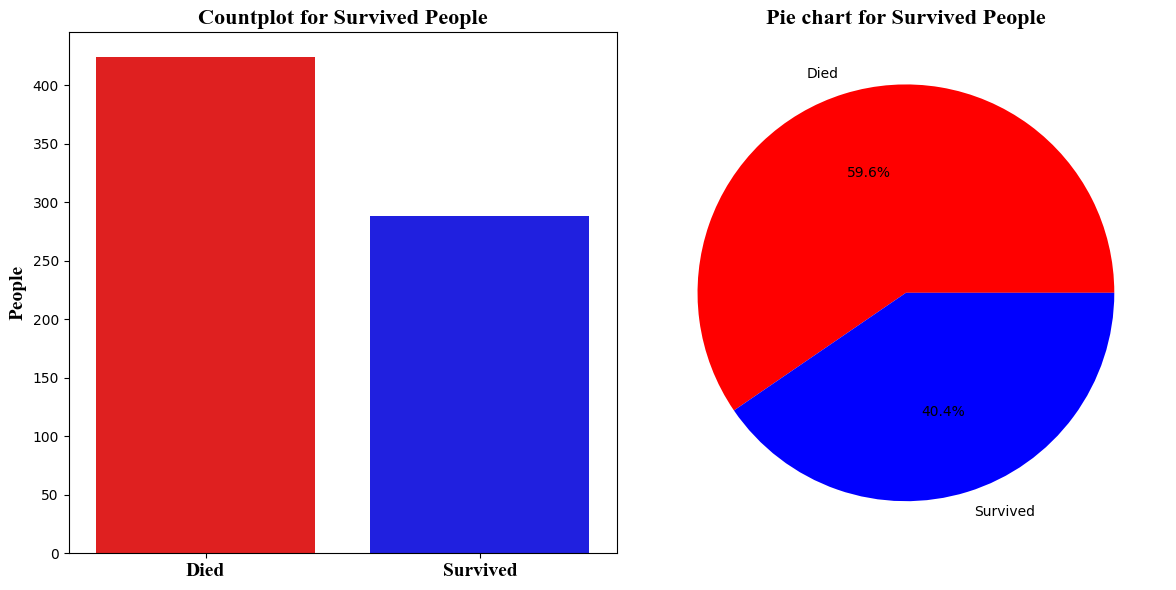

In [ ]:
# Check the people who survived
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot for people who survived
sns.countplot(
    x='Survived',
    hue='Survived',
    data=train_df,
    palette=['red', 'blue'],
    ax=axes[0],
    dodge=False  # Ensures no separation of bars
)
axes[0].set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xlabel('')
axes[0].set_xticks([0, 1])  # Explicitly set the ticks
axes[0].set_xticklabels(['Died', 'Survived'], fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_title('Countplot for Survived People', fontsize=16, fontweight='bold', fontname='Times New Roman')
axes[0].legend_.remove()  # Remove redundant legend


# Pie chart for Survived People
train_df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['red', 'blue'],
    labels=['Died', 'Survived'],
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title('Pie chart for Survived People', fontsize=16, fontweight='bold', fontname='Times New Roman')

plt.tight_layout()
plt.show()

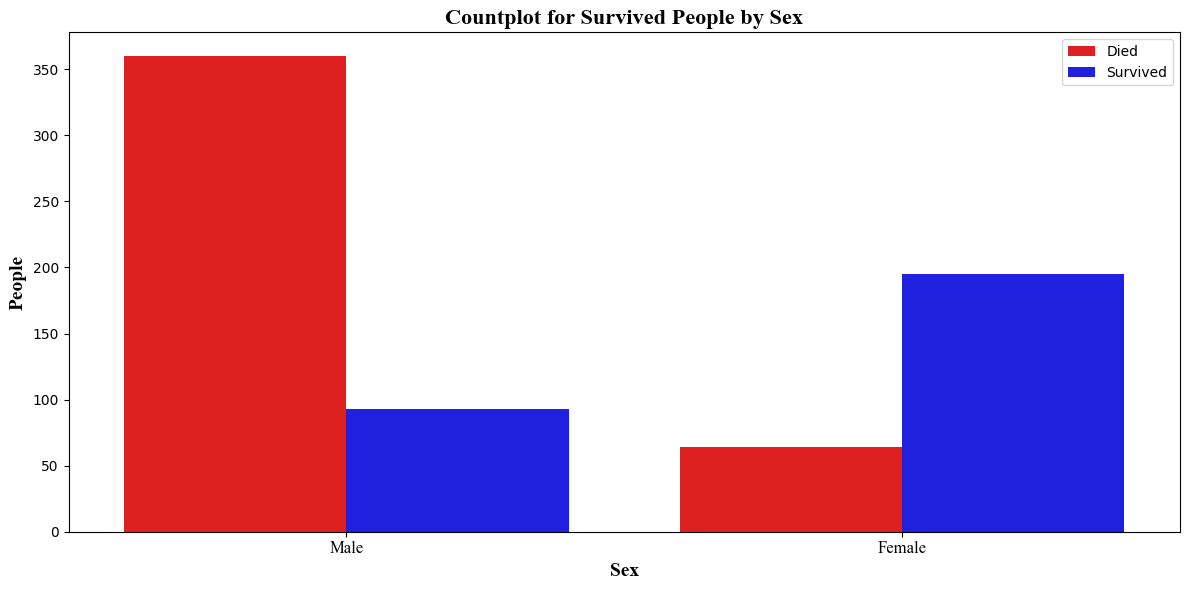

In [ ]:
# Countplot for people who survived Sex
fig, ax = plt.subplots(1, figsize=(12, 6))

sns.countplot(
    x='Sex',
    hue='Survived',
    data=train_df,
    palette=['red', 'blue']
)
ax.set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xlabel('Sex', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontsize=12, fontname='Times New Roman')
ax.set_title('Countplot for Survived People by Sex', fontsize=16, fontweight='bold', fontname='Times New Roman')

ax.legend(['Died', 'Survived'], loc='upper right')
plt.tight_layout()
plt.show()

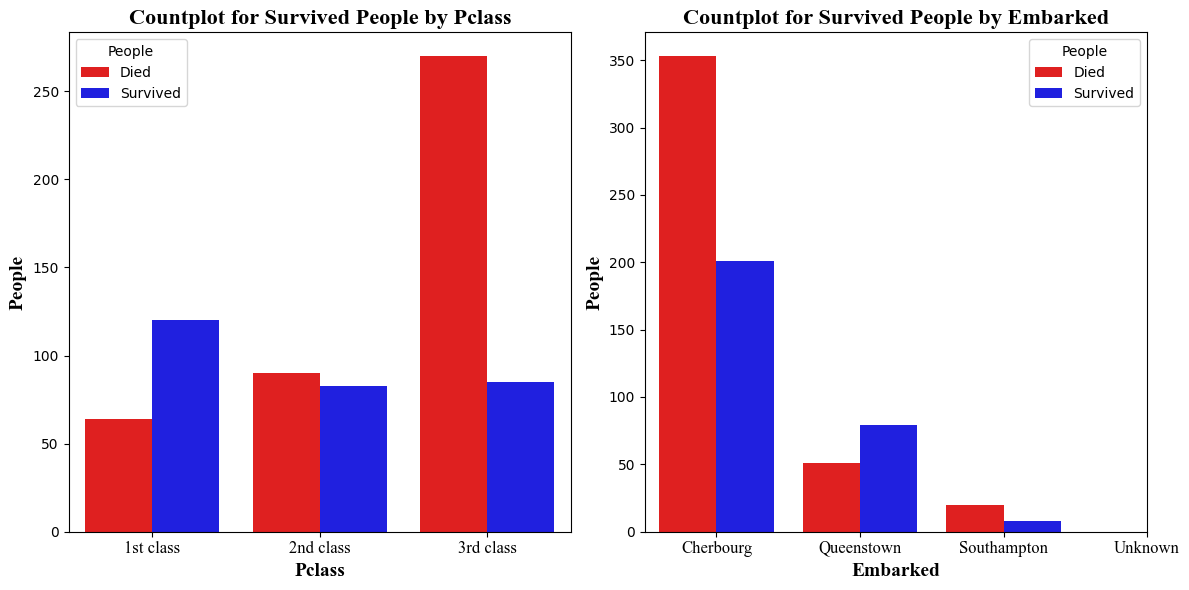

In [ ]:
# Countplot for people who survived by Pclass
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette=['red', 'blue'], ax=axes[0])
axes[0].set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xlabel('Pclass', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['1st class', '2nd class', '3rd class'], fontsize=12, fontname='Times New Roman')
axes[0].set_title('Countplot for Survived People by Pclass', fontsize=16, fontweight='bold', fontname='Times New Roman')
axes[0].legend(['Died', 'Survived'], title='People', loc='upper left')

# Countplot for people who survived by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train_df, palette=['red', 'blue'], ax=axes[1])
axes[1].set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[1].set_xlabel('Embarked', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[1].set_xticks([0, 1, 2, 3])  # Corrected from set_xtick to set_xticks
axes[1].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton', 'Unknown'], fontsize=12, fontname='Times New Roman')
axes[1].set_title('Countplot for Survived People by Embarked', fontsize=16, fontweight='bold', fontname='Times New Roman')
axes[1].legend(['Died', 'Survived'], title='People', loc='upper right')

plt.tight_layout()
plt.show()

# Data Preprocess

In [ ]:
raw_df = pd.concat([train_df,test_df], axis = 0)

In [ ]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

## Feature Engineering

### Sort the ages into logical categories

In [ ]:
raw_df["Age"] = raw_df["Age"].fillna(-0.5)
bins = [-1, 0, 4, 12, 18, 23, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']
raw_df['AgeGroup'] = pd.cut(raw_df["Age"], bins, labels=labels)

AgeGroup_dum = pd.get_dummies(raw_df['AgeGroup'], drop_first=True)
raw_df = pd.concat([raw_df, AgeGroup_dum], axis=1)

### Extract a title for each Name in the dataset

In [ ]:
raw_df['Title'] = raw_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# display the crosstab of Title and Sex
pd.crosstab(raw_df['Title'], raw_df['Sex'])

# replace various titles with more common names
raw_df['Title'] = raw_df['Title'].replace(['Lady', 'Capt', 'Col',
                                           'Don', 'Dr', 'Major',
                                           'Rev', 'Jonkheer', 'Dona'],
                                           'Rare')
raw_df['Title'] = raw_df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
raw_df['Title'] = raw_df['Title'].replace('Mlle', 'Miss')
raw_df['Title'] = raw_df['Title'].replace('Ms', 'Miss')
raw_df['Title'] = raw_df['Title'].replace('Mme', 'Mrs')

title_dum = pd.get_dummies(raw_df['Title'], drop_first=True)
raw_df = pd.concat([raw_df, title_dum], axis=1)

In [ ]:
## Create Features for Male & Female
sex_dum = pd.get_dummies(raw_df['Sex'])
raw_df = pd.concat([raw_df, sex_dum], axis=1)

## Create fetures for Embarked
raw_df['Embarked'] = raw_df['Embarked'].fillna('S')
Embarked_dum = pd.get_dummies(raw_df['Embarked'], drop_first=True)
raw_df = pd.concat([raw_df, Embarked_dum], axis=1)

In [ ]:
raw_df['Fare'] = raw_df['Fare'].fillna(raw_df['Fare'].median())

In [ ]:
raw_df['FamilySize'] = raw_df['SibSp'] + raw_df['Parch'] + 1

raw_df['Single'] = np.where(raw_df['FamilySize'] == 1, 1, 0)

### Drop Unuseful Informations

In [ ]:
raw_df = raw_df.drop(columns=['Name', 'Embarked', 'Age', 'AgeGroup',  'Title'])
del AgeGroup_dum, title_dum, Embarked_dum, bins, labels, ax, axes, fig
print(raw_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult',
       'Senior', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal', 'female', 'male', 'Q',
       'S', 'FamilySize', 'Single'],
      dtype='object')


In [ ]:
train_df = raw_df[:train_df.shape[0]].reset_index(drop=True)
test_df = raw_df[train_df.shape[0]:].reset_index(drop=True)

### Cluster

In [ ]:
# # Assuming raw_df is a DataFrame already loaded
# kmeans = KMeans(n_clusters=2, random_state=42)  # Specify the number of clusters
# X = raw_df.drop(['PassengerId', 'Survived'], axis=1)
# kmeans.fit(X)
# raw_df['Cluster'] = kmeans.labels_  # Add cluster labels to the DataFrame

# # Scatter plot using two features from X (e.g., the first two columns)
# plt.scatter(X.iloc[:, 0], X.iloc[:, 6], c=raw_df['Cluster'], cmap='viridis')
# plt.xlabel(X.columns[0])
# plt.ylabel(X.columns[1])
# plt.title('KMeans Clustering')
# plt.colorbar(label='Cluster')
# plt.show()

# Create a Model

In [ ]:
print(train_df.drop('Sex',axis=1).corr()['Survived'].abs().sort_values(ascending=False))
print(train_df.columns)

Survived       1.000000
Mr             0.541714
male           0.536762
female         0.536762
Pclass         0.356462
Miss           0.332409
Mrs            0.329590
Fare           0.266100
Single         0.199741
S              0.159015
Baby           0.134469
Parch          0.095265
Student        0.082331
Senior         0.076019
Royal          0.064398
Q              0.048966
FamilySize     0.045068
Rare           0.036196
PassengerId    0.029526
Child          0.018381
Teenager       0.016199
SibSp          0.015523
Young Adult    0.014806
Adult          0.009461
Name: Survived, dtype: float64
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult',
       'Senior', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal', 'female', 'male', 'Q',
       'S', 'FamilySize', 'Single'],
      dtype='object')


### Model Feature

In [ ]:
features = [
    'Pclass', 'SibSp', 'Parch', 'Fare',
    'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult',
    'Senior', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal', 'female', 'male', 'Q',
    'S', 'FamilySize', 'Single']

X = train_df[features]
Y = train_df['Survived']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model Training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=42)

### Define the models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.35, subsample=0.4, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.35, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

### Train and evaluate each model

In [ ]:
results = {}
threshold = 0.55
for name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilities for class 1
    y_prob = model.predict_proba(X_test)[:, 1]

    # Apply custom threshold
    y_pred = (y_prob >= threshold).astype(int)

    # Compute evaluation metrics
    results[name] = {
        "Accuracy" : accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred),
        "Recall"   : recall_score(Y_test, y_pred),
        "F1 Score" : f1_score(Y_test, y_pred),
        "ROC AUC" : roc_auc_score(Y_test, y_prob)  # AUC doesn't depend on threshold
    }

# Print formatted results
for name, scores in results.items():
    print(f"Model: {name}")
    for metric, value in scores.items():
        print(f"{metric:<10}: {value:.4f}")
    print("-" * 45)

Model: Logistic Regression
Accuracy  : 0.8194
Precision : 0.8148
Recall    : 0.7333
F1 Score  : 0.7719
ROC AUC   : 0.8667
---------------------------------------------
Model: Random Forest
Accuracy  : 0.8194
Precision : 0.8400
Recall    : 0.7000
F1 Score  : 0.7636
ROC AUC   : 0.8722
---------------------------------------------
Model: Gradient Boosting
Accuracy  : 0.7639
Precision : 0.7241
Recall    : 0.7000
F1 Score  : 0.7119
ROC AUC   : 0.7480
---------------------------------------------
Model: AdaBoost
Accuracy  : 0.8056
Precision : 0.8077
Recall    : 0.7000
F1 Score  : 0.7500
ROC AUC   : 0.8476
---------------------------------------------
Model: XGBoost
Accuracy  : 0.8194
Precision : 0.8400
Recall    : 0.7000
F1 Score  : 0.7636
ROC AUC   : 0.8302
---------------------------------------------


### Select the best model based on the evaluation metrics

In [ ]:
best_model_name = max(results, key=lambda x: results[x]['F1 Score'])
best_model = models[best_model_name]
best_model.fit(X_train, Y_train)
print(f"Best model selected: {best_model_name}")

Best model selected: Logistic Regression


# Fit the best model in whole training dataset

In [ ]:
best_model.fit(X_scaled, Y)

LogisticRegression(random_state=42)

# Model Predict Testing Data

In [ ]:
test_features = scaler.fit_transform(test_df[features])
test_df['Survived'] = best_model.predict(test_features) # Make predictions on the test dataset
Titanic_submission = test_df[['PassengerId','Survived']] # Create a DataFrame for submission

### Create a figure barplot for Survived by Sex for Testing Dataset

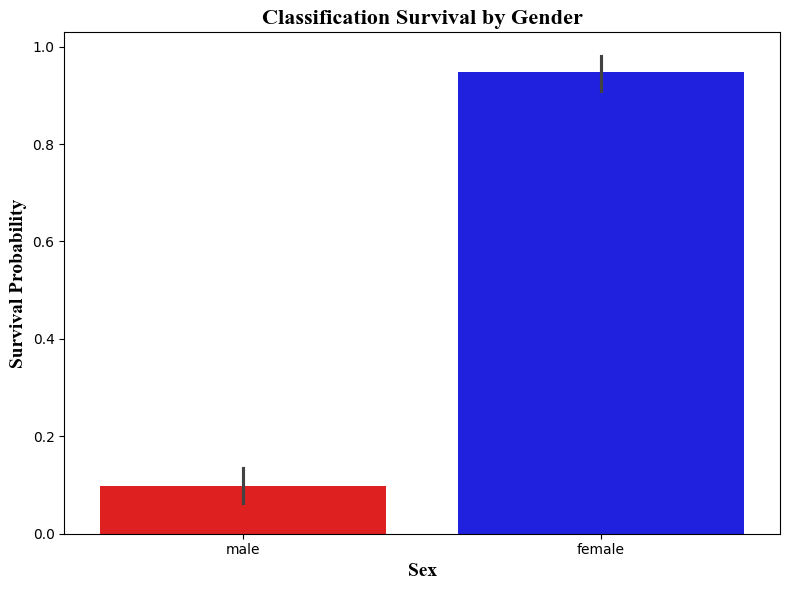

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x='Sex',  # Use the column name from test_df
    y='Survived',
    hue='Sex',
    data=test_df,
    palette=['red', 'blue'],
    dodge=False
)

ax.set_ylabel('Survival Probability', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xlabel('Sex', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_title('Classification Survival by Gender', fontsize=16, fontweight='bold', fontname='Times New Roman')

plt.tight_layout()
plt.show()

### Save the DataFrame to a CSV file

In [ ]:
Titanic_submission.to_csv('Titanic_submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
